# Working on analysis part of topic modeling

- keyword data

There are couple of pickle files extract from other work

- 1)-patent_firm_full_clean.pkl extracted from File1-Firm_Preprocessing
- 2)-eda.pkl extracted from File2-EDA
- 3)-work_on_data extracted from File3-Topic modeling

- Finally, we will create a pkl file from this as well for future use in visualizations. tech_type_per_topic.pkl

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [6]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [8]:
import pickle

In [9]:
p_firm = pd.read_pickle('patent_firm_full_clean.pkl')
p_firm.shape

(68764, 35)

In [10]:
patent = pd.read_pickle('eda.pkl')
patent.shape

(68762, 38)

In [11]:
patent.head(2)

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date,year
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,52393850\r\n16916549\r\n54353461\r\n48212422\r...,27071024\r\n1239277\r\n25508001\r\n22545199\r\...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990


In [12]:
data_work = pd.read_pickle('work_on_data.pkl')
data_work.shape

(68762, 7)

In [13]:
data = pd.read_pickle('top08_topic_dominant.pkl')
data.shape

(68762, 5)

### select useful features only

In [14]:
data.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.3972,"charge, battery, module, power, voltage, elect...","[electrical, energy, system, include, electric..."
1,1,7.0,0.8034,"charge, battery, module, power, voltage, elect...","[electrical, energy, system, include, electric..."


**Create a dataframe for working on paper**

In [15]:
work_on_paper=data
work_on_paper.drop(['Text','Document_No'], axis=1, inplace=True)

In [16]:
work_on_paper['Assignee']=patent.assignee
work_on_paper['Year']=patent.year
work_on_paper['Abstract']=patent.appln_abstr

In [17]:
work_on_paper.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract
0,7.0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,7.0,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,1.0,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,3.0,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,3.0,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


**Topics are given number to adjust with pyvis diagram**

In [18]:
work_on_paper['Topic']=work_on_paper.Dominant_Topic.map({0:'topic1', 3:'topic2',1 :'topic3',7:'topic4', 4: 'topic5',
                                                         2 : 'topic6', 6: 'topic7', 5:'topic8'})

In [19]:
work_on_paper.Topic.value_counts()

topic1    22894
topic2    11044
topic3    10163
topic4    10063
topic5     8799
topic6     4792
topic7      708
topic8      299
Name: Topic, dtype: int64

In [20]:
work_on_paper.Dominant_Topic.value_counts()

0.0    22894
3.0    11044
1.0    10163
7.0    10063
4.0     8799
2.0     4792
6.0      708
5.0      299
Name: Dominant_Topic, dtype: int64

In [21]:
work_on_paper.drop(['Dominant_Topic'], axis=1, inplace=True)

In [22]:
work_on_paper.head(2)

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4


In [23]:
work_on_paper.to_pickle('work_on_paper.pkl')

# 1)- Pre-Model work

using eda.pkl and patent_firm_full_clean.pkl

In [24]:
p=patent

In [25]:
total_patents=p['assignee'].value_counts()

In [26]:
normal_patents=p['assignee'].value_counts(normalize=True)

In [27]:
df = pd.DataFrame({'Assigne': total_patents,
...                    'Commulative': normal_patents})

In [28]:
df.head(20)

,Assigne,Commulative
toyota motor corp,8125,0.119041
honda motor co ltd,3977,0.058268
nissan motor co ltd,2885,0.042269
bosch corp,2770,0.040584
hyundai motor co ltd,2597,0.038049
ford global technologies inc,1813,0.026563
mitsubishi motors corp,1412,0.020687
denso corp,1097,0.016072
renault sas,859,0.012585
hitachi ltd,759,0.011120


**That was our table 1: Top assignee of patents**

### Alternative method of doing this

In [29]:
p['assignee'].value_counts().head()

toyota motor corp       8125
honda motor co ltd      3977
nissan motor co ltd     2885
bosch corp              2770
hyundai motor co ltd    2597
Name: assignee, dtype: int64

In [30]:
assigne_data=p['assignee'].value_counts()

In [31]:
df_assigne= pd.DataFrame(data=assigne_data)

In [32]:
df_assigne.head(2)

,assignee
toyota motor corp,8125
honda motor co ltd,3977


In [33]:
df_assigne['Commulative']=p['assignee'].value_counts(normalize=True)

In [34]:
df_assigne.head(2)

,assignee,Commulative
toyota motor corp,8125,0.119041
honda motor co ltd,3977,0.058268


### Alternative way 2

In [35]:
value_counts = p['assignee'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('Top Companies').reset_index(name='patent-counts')
df_val_counts = pd.DataFrame(data)
df_val_counts[:30]

,Top Companies,patent-counts
0,toyota motor corp,8125
1,honda motor co ltd,3977
2,nissan motor co ltd,2885
3,bosch corp,2770
4,hyundai motor co ltd,2597
5,ford global technologies inc,1813
6,mitsubishi motors corp,1412
7,denso corp,1097
8,renault sas,859
9,hitachi ltd,759


In [36]:
df.Commulative[:5]

toyota motor corp       0.119041
honda motor co ltd      0.058268
nissan motor co ltd     0.042269
bosch corp              0.040584
hyundai motor co ltd    0.038049
Name: Commulative, dtype: float64

In [37]:
value_counts_norm = p['assignee'].value_counts(normalize=True , dropna=True, sort=True)
data2 = value_counts_norm.rename_axis('Top Companies').reset_index(name='patent-counts in percetange')
df_val_counts_norm = pd.DataFrame(data2)
df_val_counts_norm[:30]

,Top Companies,patent-counts in percetange
0,toyota motor corp,0.119041
1,honda motor co ltd,0.058268
2,nissan motor co ltd,0.042269
3,bosch corp,0.040584
4,hyundai motor co ltd,0.038049
5,ford global technologies inc,0.026563
6,mitsubishi motors corp,0.020687
7,denso corp,0.016072
8,renault sas,0.012585
9,hitachi ltd,0.011120


**All togather**

In [38]:
df_val_counts_norm['Patent-Count']=df_val_counts['patent-counts']
df_val_counts_norm[:30]

,Top Companies,patent-counts in percetange,Patent-Count
0,toyota motor corp,0.119041,8125
1,honda motor co ltd,0.058268,3977
2,nissan motor co ltd,0.042269,2885
3,bosch corp,0.040584,2770
4,hyundai motor co ltd,0.038049,2597
5,ford global technologies inc,0.026563,1813
6,mitsubishi motors corp,0.020687,1412
7,denso corp,0.016072,1097
8,renault sas,0.012585,859
9,hitachi ltd,0.011120,759


**This is our final table results**

# Figure 3

year vice analysis

In [39]:
p.groupby(p.year).size()

year
1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
dtype: int64

In [40]:
#Or we can
p.year.value_counts().sort_index()

1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
Name: year, dtype: int64

In [41]:
p.year.value_counts(ascending=True).sort_index()

1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
Name: year, dtype: int64

In [42]:
# For checking distribution of patent over years
dist=p.year.value_counts(ascending=True).sort_index()

In [43]:
type(dist)

pandas.core.series.Series

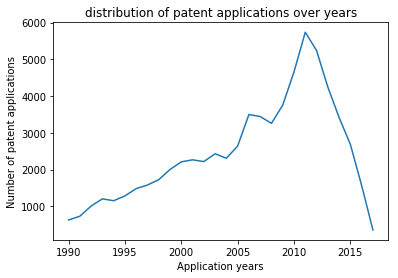

In [44]:
dist.plot()
plt.xlabel('Application years')
plt.ylabel('Number of patent applications')
plt.title('distribution of patent applications over years')
#plt.legend()
plt.show()

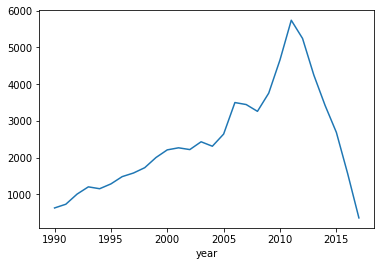

In [45]:
# We can always use groupby. Here we have two variables "year" and "granted"
p.groupby(p.year).granted.count().plot()

**The steep drop in patent applications in 2014 is due to the patent ﬁlling process at the USPTO, which involves a signiﬁcant time lag between the ﬁling and disclosure or registration of applications, ranging from several months to over two years.**

So work uptill fig 3 is done

### using plotly

In [46]:
value=p.year.value_counts().sort_index()

In [47]:
value_df=pd.DataFrame(data=value)

In [48]:
value_df.head()

,year
1990,631
1991,732
1992,1008
1993,1205
1994,1154


In [49]:
pyo.plot([{
    'x' : value_df.index,
    'y' : value_df[col],
    'name' : col
  

}for col in value_df.columns],filename='distribution.html')

'distribution.html'

In [50]:
traces=[go.Scatter(
    x=value_df.index,
    y=value_df[col],
    name= col



)for col in value_df.columns]

In [51]:
data=traces

In [52]:
layout=go.Layout(
title='Patent distribution over the year',
xaxis=dict(title='Application years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [53]:
figure1= go.Figure(data=data, layout=layout)

In [54]:
pyo.plot(figure1,filename='distribution2.html')

'distribution2.html'

# 2)-After Modeling

We shall use already saved file "work_on_paper.pkl". It has topics in pyvis order

### 4a) Change in the number of patents 

In [55]:
data = pd.read_pickle('work_on_paper.pkl')

In [56]:
data.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2


In [57]:
data.Topic.value_counts()

topic1    22894
topic2    11044
topic3    10163
topic4    10063
topic5     8799
topic6     4792
topic7      708
topic8      299
Name: Topic, dtype: int64

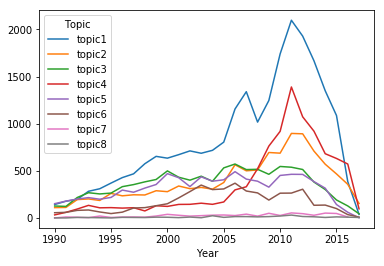

In [58]:
d=data
d=d.groupby(["Year","Topic"]).size()
d=d.unstack('Topic')
d.plot()

# Using plotly

In [59]:
d=data

In [60]:
d=d.groupby(["Year","Topic"]).size()

In [61]:
d.head()

Year    Topic 
1990.0  topic1    144
        topic2    111
        topic3    128
        topic4     34
        topic5    153
dtype: int64

In [62]:
df_patent=d.unstack('Topic')

In [63]:
type(df_patent)

pandas.core.frame.DataFrame

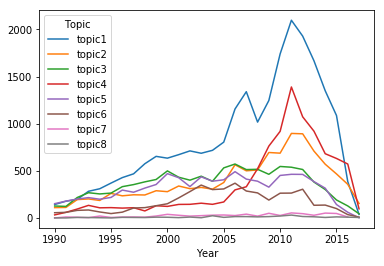

In [64]:
df_patent.plot()

In [65]:
df_patent2=df_patent.T

In [66]:
df_patent2

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,144.0,179.0,198.0,284.0,311.0,371.0,429.0,469.0,576.0,654.0,...,1017.0,1246.0,1739.0,2096.0,1928.0,1667.0,1349.0,1087.0,387.0,39.0
topic2,111.0,113.0,196.0,203.0,187.0,262.0,236.0,247.0,245.0,290.0,...,510.0,695.0,688.0,897.0,893.0,710.0,571.0,468.0,358.0,155.0
topic3,128.0,124.0,218.0,269.0,256.0,265.0,333.0,355.0,384.0,409.0,...,517.0,464.0,547.0,539.0,515.0,382.0,303.0,192.0,129.0,46.0
topic4,34.0,61.0,96.0,135.0,109.0,111.0,106.0,110.0,76.0,131.0,...,523.0,763.0,919.0,1389.0,1073.0,921.0,682.0,632.0,573.0,98.0
topic5,153.0,180.0,202.0,217.0,200.0,219.0,297.0,274.0,318.0,356.0,...,391.0,328.0,452.0,464.0,463.0,387.0,317.0,144.0,62.0,3.0
topic6,57.0,61.0,82.0,86.0,65.0,48.0,63.0,107.0,111.0,131.0,...,267.0,191.0,264.0,265.0,306.0,136.0,138.0,101.0,37.0,11.0
topic7,2.0,12.0,9.0,5.0,22.0,7.0,11.0,12.0,10.0,22.0,...,21.0,51.0,28.0,55.0,47.0,30.0,53.0,49.0,12.0,NaN
topic8,2.0,2.0,7.0,6.0,4.0,2.0,8.0,7.0,6.0,10.0,...,13.0,16.0,22.0,32.0,17.0,14.0,7.0,13.0,10.0,7.0


In [67]:
traces=[go.Scatter(
    x=df_patent2.columns,
    y=df_patent2.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent2.index]

In [68]:
data=traces

In [69]:
layout=go.Layout(
title='Change in the number of patents over filling years',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [70]:
#layout=go.Layout(title='Change in the number of patents over filling years')

In [71]:
figure1= go.Figure(data=data, layout=layout)

In [72]:
pyo.plot(figure1,filename='Change in the number of patents.html')

'Change in the number of patents.html'

**Alternative way**

In [73]:
data = pd.read_pickle('work_on_paper.pkl')

In [74]:
f=data.groupby(data.Year).Topic.value_counts()

In [75]:
f=f.unstack('Topic')

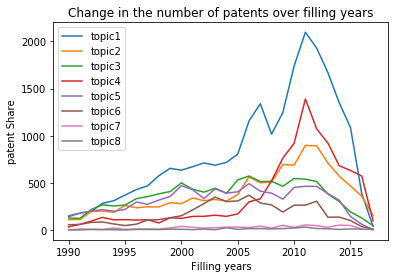

In [76]:
f.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the number of patents over filling years')
plt.legend()
plt.show()

**result of figure 4a**

### 4(b) Change in the share of patents over filing year

In [77]:
data.Topic.value_counts(normalize=True)

topic1    0.332946
topic2    0.160612
topic3    0.147800
topic4    0.146345
topic5    0.127963
topic6    0.069690
topic7    0.010296
topic8    0.004348
Name: Topic, dtype: float64

In [78]:
data.groupby(data.Year).Topic.value_counts(normalize=True)

Year    Topic 
1990.0  topic5    0.242472
        topic1    0.228209
        topic3    0.202853
        topic2    0.175911
        topic6    0.090333
        topic4    0.053883
        topic7    0.003170
        topic8    0.003170
1991.0  topic5    0.245902
        topic1    0.244536
        topic3    0.169399
        topic2    0.154372
        topic4    0.083333
        topic6    0.083333
        topic7    0.016393
        topic8    0.002732
1992.0  topic3    0.216270
        topic5    0.200397
        topic1    0.196429
        topic2    0.194444
        topic4    0.095238
        topic6    0.081349
        topic7    0.008929
        topic8    0.006944
1993.0  topic1    0.235685
        topic3    0.223237
        topic5    0.180083
        topic2    0.168465
        topic4    0.112033
        topic6    0.071369
                    ...   
2014.0  topic4    0.199415
        topic2    0.166959
        topic5    0.092690
        topic3    0.088596
        topic6    0.040351
        topic

In [79]:
c=data.groupby(data.Year).Topic.value_counts(normalize=True)

In [80]:
c=c.unstack('Topic')

In [81]:
c

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Year,,,,,,,,
1990.0,0.228209,0.175911,0.202853,0.053883,0.242472,0.090333,0.003170,0.003170
1991.0,0.244536,0.154372,0.169399,0.083333,0.245902,0.083333,0.016393,0.002732
1992.0,0.196429,0.194444,0.216270,0.095238,0.200397,0.081349,0.008929,0.006944
1993.0,0.235685,0.168465,0.223237,0.112033,0.180083,0.071369,0.004149,0.004979
1994.0,0.269497,0.162045,0.221837,0.094454,0.173310,0.056326,0.019064,0.003466
1995.0,0.288716,0.203891,0.206226,0.086381,0.170428,0.037354,0.005447,0.001556
1996.0,0.289278,0.159137,0.224545,0.071477,0.200270,0.042481,0.007417,0.005394
1997.0,0.296648,0.156230,0.224541,0.069576,0.173308,0.067679,0.007590,0.004428
1998.0,0.333720,0.141947,0.222480,0.044032,0.184241,0.064311,0.005794,0.003476


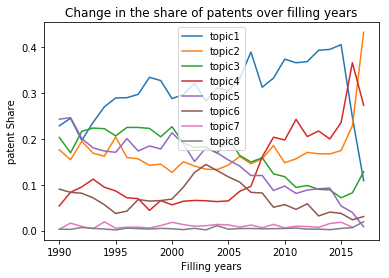

In [82]:
c.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

### Using plotly

In [83]:
df_patent=c.T

In [84]:
df_patent

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,0.228209,0.244536,0.196429,0.235685,0.269497,0.288716,0.289278,0.296648,0.333720,0.326510,...,0.312059,0.331913,0.373256,0.365348,0.367799,0.392512,0.394444,0.404691,0.246811,0.108635
topic2,0.175911,0.154372,0.194444,0.168465,0.162045,0.203891,0.159137,0.156230,0.141947,0.144783,...,0.156490,0.185136,0.147671,0.156353,0.170355,0.167177,0.166959,0.174237,0.228316,0.431755
topic3,0.202853,0.169399,0.216270,0.223237,0.221837,0.206226,0.224545,0.224541,0.222480,0.204194,...,0.158638,0.123601,0.117407,0.093952,0.098245,0.089946,0.088596,0.071482,0.082270,0.128134
topic4,0.053883,0.083333,0.095238,0.112033,0.094454,0.086381,0.071477,0.069576,0.044032,0.065402,...,0.160479,0.203250,0.197253,0.242113,0.204693,0.216859,0.199415,0.235294,0.365434,0.272981
topic5,0.242472,0.245902,0.200397,0.180083,0.173310,0.170428,0.200270,0.173308,0.184241,0.177733,...,0.119975,0.087373,0.097017,0.080879,0.088325,0.091123,0.092690,0.053611,0.039541,0.008357
topic6,0.090333,0.083333,0.081349,0.071369,0.056326,0.037354,0.042481,0.067679,0.064311,0.065402,...,0.081927,0.050879,0.056665,0.046191,0.058375,0.032023,0.040351,0.037602,0.023597,0.030641
topic7,0.003170,0.016393,0.008929,0.004149,0.019064,0.005447,0.007417,0.007590,0.005794,0.010984,...,0.006444,0.013586,0.006010,0.009587,0.008966,0.007064,0.015497,0.018243,0.007653,NaN
topic8,0.003170,0.002732,0.006944,0.004979,0.003466,0.001556,0.005394,0.004428,0.003476,0.004993,...,0.003989,0.004262,0.004722,0.005578,0.003243,0.003296,0.002047,0.004840,0.006378,0.019499


In [85]:
traces=[go.Scatter(
    x=df_patent.columns,
    y=df_patent.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent.index]

In [86]:
data=traces

In [87]:
layout=go.Layout(
title='Change in the share of patents over filing year',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [88]:
figure2= go.Figure(data=data, layout=layout)

In [89]:
pyo.plot(figure2,filename='patent_count_normalized.html')

'patent_count_normalized.html'

# Table 6: Major assignee by topic type

In [92]:
df = pd.read_pickle('work_on_paper.pkl')
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2


In [93]:
from collections import Counter
Counter(df.Topic)

Counter({'topic4': 10063,
         'topic3': 10163,
         'topic2': 11044,
         'topic5': 8799,
         'topic1': 22894,
         'topic6': 4792,
         'topic7': 708,
         'topic8': 299})

In [94]:
company=df.groupby(df.Topic).Assignee.value_counts(dropna=True, sort=True)

In [95]:
df_company = pd.DataFrame(company)
df_company

Assignee
Topic  Assignee                                                    
topic1 toyota motor corp                                       4452
       nissan motor co ltd                                     1737
       honda motor co ltd                                      1580
       hyundai motor co ltd                                    1312
       ford global technologies inc                             959
       mitsubishi motors corp                                   715
       bosch corp                                               580
       denso corp                                               477
       aisin aw co ltd                                          314
       hitachi ltd                                              312
       suzuki motor corp                                        199
       peugeot citroen automobiles                              166
       general motors corporation                               164
       renault sas                                              160
       mazda motor corp                                         147
       hino motors ltd                                          121
       fuji heavy ind ltd                                       106
       daimlerchrysler ag                                       104
       jatco ltd                                                100
       jaguar land rover limited                                 95
       hitachi automotive systems ltd                            94
       yamaha motor co ltd                                       94
       ntn corporation                                           87
       bmw ag                                                    86
       isuzu motors ltd                                          84
       volkswagen group                                          73
       kia motors corporation                                    66
       daihatsu motor co ltd                                     64
       byd company limited                                       60
       toshiba corp                                              57
...                                                             ...
topic8 siemens vdo automotive                                     1
       sumec machinery & electric co ltd                          1
       sun zhonglin                                               1
       suxuki motor corp                                          1
       suzhou industrial park institute of vocational ...         1
       swanson; lennart h                                         1
       tamura kouichi                                             1
       tianjin maritime college                                   1
       toyo roki mfg co ltd                                       1
       toyo roki seizo kabushiki kaisha                           1
       unisia jecs corp atsugi kanagawa jp                        1
       volkswagen group                                           1
       waelput; erik f m                                          1
       wang guangrui                                              1
       wang lanan                                                 1
       watanabe koichiro                                          1
       weichai power co ltd                                       1
       wenzhou yongyu filter co ltd                               1
       wu lilin                                                   1
       wu mengdie                                                 1
       wuxi meiyang power technology co ltd                       1
       xiamen wattpower tech co ltd                               1
       yanghang middle school affiliated to east china...         1
       yangzhou feichi dynamic technology co ltd                  1
       yanmar diesel engine co ltd                                1
       yu qinsheng                                                1
       zhang tianbing                          

### For a specific topic listing wrt firms

In [96]:
topic_firm=df.groupby([df['Topic']=='topic1']).Assignee.value_counts(dropna=True, sort=True)

In [97]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
Topic Assignee                                                    
False toyota motor corp                                       3673
      honda motor co ltd                                      2397
      bosch corp                                              2190
      hyundai motor co ltd                                    1285
      nissan motor co ltd                                     1148
      ford global technologies inc                             854
      renault sas                                              699
      mitsubishi motors corp                                   697
      denso corp                                               620
      peugeot citroen automobiles                              522
      hitachi ltd                                              447
      daimlerchrysler ag                                       399
      yamaha motor co ltd                                      372
      suzuki motor corp                                        329
      general motors corporation                               311
      volkswagen group                                         302
      continental automotive gmbh                              278
      siemens aktiengesellschaft                               235
      lsis co ltd                                              219
      isuzu motors ltd                                         216
      audi ag                                                  173
      general electric company                                 150
      aisin aw co ltd                                          144
      mazda motor corp                                         127
      bmw ag                                                   126
      mahle international gmbh                                 111
      sony corporation                                         111
      avl list gmbh                                            102
      beiqi foton motor co ltd                                 101
      korea advanced institute of science and technology       101

In [98]:
d=df
d=d[d.Topic=="topic1"]

In [99]:
len(d)

22894

In [100]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
43,0.6716,"torque, mode, motor, power, speed, control, dr...",laimböck franz diplingdr,1992.0,For the drive shaft of a motor vehicle a drive...,topic1
44,0.7062,"torque, mode, motor, power, speed, control, dr...",furantsu raimubetsuku,1992.0,PURPOSE: To optimize the various operational c...,topic1
46,0.6459,"torque, mode, motor, power, speed, control, dr...",microcon software entwicklung gmbh,1999.0,The arrangement has actuating the choke flap (...,topic1
52,0.5342,"torque, mode, motor, power, speed, control, dr...",kornel hideg,1990.0,In a device for saving fuel in a motor vehicle...,topic1
70,0.6077,"torque, mode, motor, power, speed, control, dr...",elin energieanwendung gesellschaft mbh,1992.0,The invention is a drive for an electric vehic...,topic1


In [101]:
d=d.groupby(['Assignee']).size()

In [102]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               4452
nissan motor co ltd             1737
honda motor co ltd              1580
hyundai motor co ltd            1312
ford global technologies inc     959
mitsubishi motors corp           715
bosch corp                       580
denso corp                       477
aisin aw co ltd                  314
hitachi ltd                      312
dtype: int64

**These are top 10 firms using Topic 1**

### For topic2

In [103]:
k=df
k=k[k.Topic=="topic2"]
len(k)

11044

In [104]:
k[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2
6,0.4956,"gear, shaft, first, second, motor, connect, si...",ricardo cayetano algeri,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...,topic2
7,0.5196,"gear, shaft, first, second, motor, connect, si...",algeri; ricardo cayetano,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...,topic2
22,0.6191,"gear, shaft, first, second, motor, connect, si...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic2


In [105]:
k=k.groupby(['Assignee']).size()
k.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd              951
toyota motor corp               626
hyundai motor co ltd            526
bosch corp                      280
nissan motor co ltd             221
yamaha motor co ltd             194
ford global technologies inc    159
mitsubishi motors corp          130
suzuki motor corp               128
peugeot citroen automobiles     117
dtype: int64

### Topic3

In [106]:
e=df
e=e[e.Topic=="topic3"]
len(e)

10163

In [107]:
e[:2]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3
5,0.5406,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,"PCT No. PCT/JP96/02405 Sec. 371 Date Nov. 17, ...",topic3


In [108]:
e=e.groupby(['Assignee']).size()
e.sort_values(ascending=False)[:10]

Assignee
bosch corp                      867
toyota motor corp               543
honda motor co ltd              339
renault sas                     246
ford global technologies inc    205
nissan motor co ltd             175
daimlerchrysler ag              155
peugeot citroen automobiles     144
hyundai motor co ltd            143
denso corp                      112
dtype: int64

### Topic 4

In [109]:
f=df
f=f[f.Topic=="topic4"]
len(f)

10063

In [110]:
f=f.groupby(['Assignee']).size()
f.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               389
honda motor co ltd              326
hyundai motor co ltd            264
lsis co ltd                     210
mitsubishi motors corp          205
ford global technologies inc    152
nissan motor co ltd             143
bosch corp                      134
general electric company        115
hitachi ltd                      97
dtype: int64

### Topic 5

In [111]:
g=df
g=g[g.Topic=="topic5"]
len(g)

8799

In [112]:
g=g.groupby(['Assignee']).size()
g.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               1697
bosch corp                       856
honda motor co ltd               527
nissan motor co ltd              426
denso corp                       277
ford global technologies inc     275
mitsubishi motors corp           263
renault sas                      222
peugeot citroen automobiles      184
isuzu motors ltd                 155
dtype: int64

### Topic 6

In [113]:
h=df
h=h[h.Topic=="topic6"]
len(h)

4792

In [114]:
h=h.groupby(['Assignee']).size()
h.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                        319
honda motor co ltd                       181
hyundai motor co ltd                     171
nissan motor co ltd                      153
samsung sdi co ltd                        72
renault sas                               52
bosch corp                                46
sony corporation                          46
general motors corporation                45
matsushita electric industrial co ltd     35
dtype: int64

### Topic 7

In [115]:
i=df
i=i[i.Topic=="topic7"]
len(i)

708

In [116]:
i=i.groupby(['Assignee']).size()
i.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               88
hyundai motor co ltd            60
ford global technologies inc    29
honda motor co ltd              29
renault sas                     22
nissan motor co ltd             21
denso corp                      21
peugeot citroen automobiles     18
suzuki motor corp               11
general motors corporation      10
dtype: int64

### Topic 8

In [117]:
j=df
j=j[j.Topic=="topic8"]
len(j)

299

In [118]:
j=j.groupby(['Assignee']).size()
j.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd                   44
suzuki motor corp                    24
toyota motor corp                    11
nissan motor co ltd                   9
envirolution inc                      5
hyundai motor co ltd                  5
deere & company                       5
kawasaki jukogyo kabushiki kaisha     4
mann+hummel gmbh                      4
khouw raymond                         4
dtype: int64

### Using crosstab

showing each assignee and what is topic contribution in that

In [119]:
# top assignee

df.Assignee.value_counts()[:20]

toyota motor corp               8125
honda motor co ltd              3977
nissan motor co ltd             2885
bosch corp                      2770
hyundai motor co ltd            2597
ford global technologies inc    1813
mitsubishi motors corp          1412
denso corp                      1097
renault sas                      859
hitachi ltd                      759
peugeot citroen automobiles      688
suzuki motor corp                528
daimlerchrysler ag               503
general motors corporation       475
yamaha motor co ltd              466
aisin aw co ltd                  458
volkswagen group                 375
continental automotive gmbh      316
isuzu motors ltd                 300
siemens aktiengesellschaft       285
Name: Assignee, dtype: int64

In [120]:
w=df
w=w[w.Assignee=="toyota motor corp"]
w[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
4307,0.5808,"fuel, injection, catalyst, temperature, combus...",toyota motor corp,2002.0,An internal combustion engine of a vehicle is ...,topic5
5149,0.7057,"oil, pressure, valve, fuel, air, pump, gas, ex...",toyota motor corp,1991.0,PURPOSE:To prevent deteriorated fuel atomizati...,topic3
5156,0.8510,"torque, mode, motor, power, speed, control, dr...",toyota motor corp,1997.0,PROBLEM TO BE SOLVED: To provide a power gener...,topic1
5157,0.6786,"oil, pressure, valve, fuel, air, pump, gas, ex...",toyota motor corp,1995.0,PURPOSE: To reduce ventilation resistance of a...,topic3
5158,0.5150,"oil, pressure, valve, fuel, air, pump, gas, ex...",toyota motor corp,1995.0,A fuel vapor treating apparatus for an engine ...,topic3


In [121]:
len(w)

8125

In [122]:
pd.crosstab(df.Assignee=="toyota motor corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,18442,10418,9620,9674,7102,4473,620,288
True,4452,626,543,389,1697,319,88,11


**We can use %age as well to show how much a topic has contributed to Toyota Motors' innovation profile**

In [123]:
pd.crosstab(df.Assignee=="bosch corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,22314,10764,9296,9929,7943,4746,702,298
True,580,280,867,134,856,46,6,1


# 3)-Share of patents by  technological topics

table 3 in paper

- As we have decline after 2011. It had highest patents i.e 5737. So we shall take it as base year for current patent share.

- For CAGR, we will use 2009-2013. This is to represent patent sample in a symmetric way.

In [124]:
df = pd.read_pickle('work_on_paper.pkl')
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2


In [125]:
df.shape

(68762, 6)

In [126]:
# How many patents we had in year 2011
len(df[df.Year==2011])

5737

In [127]:
# start with 2011 as of base year
df.groupby(df.Year==2011).Topic.value_counts()

Year   Topic 
False  topic1    20798
       topic2    10147
       topic3     9624
       topic4     8674
       topic5     8335
       topic6     4527
       topic7      653
       topic8      267
True   topic1     2096
       topic4     1389
       topic2      897
       topic3      539
       topic5      464
       topic6      265
       topic7       55
       topic8       32
Name: Topic, dtype: int64

5737 for 2011<br>
5737/68762=8.34 %

### for patent share

In [128]:
df.groupby(df.Year==2011).Topic.value_counts(normalize=True)

Year   Topic 
False  topic1    0.329996
       topic2    0.161000
       topic3    0.152701
       topic4    0.137628
       topic5    0.132249
       topic6    0.071829
       topic7    0.010361
       topic8    0.004236
True   topic1    0.365348
       topic4    0.242113
       topic2    0.156353
       topic3    0.093952
       topic5    0.080879
       topic6    0.046191
       topic7    0.009587
       topic8    0.005578
Name: Topic, dtype: float64

In [129]:
df.groupby(df.Year==2011).Topic.count()

Year
False    63025
True      5737
Name: Topic, dtype: int64

**Total patents in 2011 are 5737**

- Let's varify : 

topic1= 2096/5737= 0.3653 Correct

### Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2009-2013

In [130]:
len(df[df.Year== 2009])

3754

In [131]:
df.groupby(df.Year==2009).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    21648
       topic2    10349
       topic3     9699
       topic4     9300
       topic5     8471
       topic6     4601
       topic7      657
       topic8      283
True   topic1     1246
       topic2      695
       topic3      464
       topic4      763
       topic5      328
       topic6      191
       topic7       51
       topic8       16
Name: Topic, dtype: int64

Initial values for patent share are given 

In [135]:
df.groupby(df.Year==2009).Topic.value_counts(normalize=True,sort=False)

Year   Topic 
False  topic1    0.333005
       topic2    0.159196
       topic3    0.149197
       topic4    0.143059
       topic5    0.130307
       topic6    0.070776
       topic7    0.010106
       topic8    0.004353
True   topic1    0.331913
       topic2    0.185136
       topic3    0.123601
       topic4    0.203250
       topic5    0.087373
       topic6    0.050879
       topic7    0.013586
       topic8    0.004262
Name: Topic, dtype: float64

**For 2013**

In [132]:
len(df[df.Year== 2013])

4247

In [133]:
df.groupby(df.Year==2013).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    21227
       topic2    10334
       topic3     9781
       topic4     9142
       topic5     8412
       topic6     4656
       topic7      678
       topic8      285
True   topic1     1667
       topic2      710
       topic3      382
       topic4      921
       topic5      387
       topic6      136
       topic7       30
       topic8       14
Name: Topic, dtype: int64

In [134]:
df.groupby(df.Year==2013).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.329024
       topic2    0.160180
       topic3    0.151608
       topic4    0.141703
       topic5    0.130388
       topic6    0.072169
       topic7    0.010509
       topic8    0.004418
True   topic1    0.392512
       topic2    0.167177
       topic3    0.089946
       topic4    0.216859
       topic5    0.091123
       topic6    0.032023
       topic7    0.007064
       topic8    0.003296
Name: Topic, dtype: float64

### Calculate for period 2008-2012

**Patent share for 2010 being standard year**

In [136]:
# How many patents we had in year 2010
len(df[df.Year==2010])

4659

In [138]:
# start with 2010 as of base year
df.groupby(df.Year==2010).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    21155
       topic2    10356
       topic3     9616
       topic4     9144
       topic5     8347
       topic6     4528
       topic7      680
       topic8      277
True   topic1     1739
       topic2      688
       topic3      547
       topic4      919
       topic5      452
       topic6      264
       topic7       28
       topic8       22
Name: Topic, dtype: int64

In [139]:
# start with 2010 as of base year
df.groupby(df.Year==2010).Topic.value_counts(sort=False, normalize=True)

Year   Topic 
False  topic1    0.330016
       topic2    0.161553
       topic3    0.150009
       topic4    0.142645
       topic5    0.130212
       topic6    0.070636
       topic7    0.010608
       topic8    0.004321
True   topic1    0.373256
       topic2    0.147671
       topic3    0.117407
       topic4    0.197253
       topic5    0.097017
       topic6    0.056665
       topic7    0.006010
       topic8    0.004722
Name: Topic, dtype: float64

**Now CGAR**

From year 2008-2012

In [140]:
len(df[df.Year== 2008])

3259

In [141]:
df.groupby(df.Year==2008).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    21877
       topic2    10534
       topic3     9646
       topic4     9540
       topic5     8408
       topic6     4525
       topic7      687
       topic8      286
True   topic1     1017
       topic2      510
       topic3      517
       topic4      523
       topic5      391
       topic6      267
       topic7       21
       topic8       13
Name: Topic, dtype: int64

In [142]:
df.groupby(df.Year==2008).Topic.value_counts(sort=False,normalize=True)

Year   Topic 
False  topic1    0.333985
       topic2    0.160817
       topic3    0.147260
       topic4    0.145642
       topic5    0.128361
       topic6    0.069081
       topic7    0.010488
       topic8    0.004366
True   topic1    0.312059
       topic2    0.156490
       topic3    0.158638
       topic4    0.160479
       topic5    0.119975
       topic6    0.081927
       topic7    0.006444
       topic8    0.003989
Name: Topic, dtype: float64

**For year 2012**

In [143]:
len(df[df.Year== 2012])

5242

In [144]:
df.groupby(df.Year==2012).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    20966
       topic2    10151
       topic3     9648
       topic4     8990
       topic5     8336
       topic6     4486
       topic7      661
       topic8      282
True   topic1     1928
       topic2      893
       topic3      515
       topic4     1073
       topic5      463
       topic6      306
       topic7       47
       topic8       17
Name: Topic, dtype: int64

In [145]:
df.groupby(df.Year==2012).Topic.value_counts(sort=False,normalize=True)

Year   Topic 
False  topic1    0.330069
       topic2    0.159808
       topic3    0.151889
       topic4    0.141530
       topic5    0.131234
       topic6    0.070623
       topic7    0.010406
       topic8    0.004440
True   topic1    0.367799
       topic2    0.170355
       topic3    0.098245
       topic4    0.204693
       topic5    0.088325
       topic6    0.058375
       topic7    0.008966
       topic8    0.003243
Name: Topic, dtype: float64

# 4)-Adding topic types as per topic

Table 6: Major assignee by topic type

In [146]:
df = pd.read_pickle('work_on_paper.pkl')

In [147]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2


### a)Adding 4 main tech types to dataframe
emerging, saturated, decline,dominant

In [172]:
df['tech_type']=df.Topic.map({'topic5':'emerging', 'topic1':'dominant', 'topic4': 'dominant', 'topic6':'decline','topic7':'decline', 'topic8':'decline','topic2': 'saturate', 'topic3':'saturate'})

In [173]:
df.tech_type.value_counts()

dominant    32957
saturate    21207
emerging     8799
decline      5799
Name: tech_type, dtype: int64

In [174]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4,dominant
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4,dominant
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3,saturate
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2,saturate
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2,saturate


In [175]:
df.to_pickle('tech_type_per_topic.pkl')

### b)- Wordcloud key words in all tech-topics

# 5- Figure 6. Major assignees by topic types. 

Adding technology types

In [176]:
from collections import Counter
Counter(df.tech_type)

Counter({'dominant': 32957,
         'saturate': 21207,
         'emerging': 8799,
         'decline': 5799})

In [177]:
company=df.groupby(df.tech_type).Assignee.value_counts(dropna=True, sort=True)

In [178]:
df_company = pd.DataFrame(company)
df_company

Assignee
tech_type Assignee                                                    
decline   toyota motor corp                                        418
          honda motor co ltd                                       254
          hyundai motor co ltd                                     236
          nissan motor co ltd                                      183
          renault sas                                               76
          samsung sdi co ltd                                        72
          suzuki motor corp                                         67
          ford global technologies inc                              63
          general motors corporation                                58
          bosch corp                                                53
          peugeot citroen automobiles                               50
          sony corporation                                          46
          denso corp                                                44
          matsushita electric industrial co ltd                     36
          daewoo shipbuilding & marine engineering co ltd           35
          hitachi ltd                                               35
          societe bic                                               34
          daimlerchrysler ag                                        33
          sony corp                                                 27
          yamaha motor co ltd                                       25
          bmw ag                                                    21
          afton chemical corporation                                20
          seiko epson corporation                                   20
          saudi arabian oil company                                 18
          volkswagen group                                          18
          nippon shokubai co ltd                                    17
          shell internationale research maatschappij bv             17
          the lubrizol corporation                                  17
          mitsubishi heavy ind ltd                                  16
          reveo inc                                                 16
...                                                                ...
saturate  zhou; shijian                                              1
          zhu chongfang                                              1
          zhu fumin                                                  1
          zhu fuyuan                                                 1
          zhu huachun                                                1
          zhu jiang                                                  1
          zhu linbo                                                  1
          zhu mingzhong                                              1
          zhu yuhai                                                  1
          zhu ziming                                                 1
          zhucheng new oriental auto meters co ltd                   1
          zhuhai yintong aviation supplies coltd                     1
          zhukov oleg vladimirovich                                  1
          zhuo honger                                                1
          ziegler ralf                                               1
          zigong city natural-gas automobile inst                    1
          zillmer michael                                            1
          zips alf                                                   1
          zodiac international                                       1
          zoeller herbert                                            1
          zonov valerij mikhajlovich                                 1
          zoomlion environmental sanitation machinery com...         1
          zoomlion heavy industry science & technology de...         1
          zotye new energy automobile co ltd                         1
          zou d

### For a specific "tech_type" listing wrt firms

In [179]:
topic_firm=df.groupby([df['tech_type']=='decline']).Assignee.value_counts(dropna=True, sort=True)

In [180]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
tech_type Assignee                                
False     toyota motor corp                   7707
          honda motor co ltd                  3723
          bosch corp                          2717
          nissan motor co ltd                 2702
          hyundai motor co ltd                2361
          ford global technologies inc        1750
          mitsubishi motors corp              1401
          denso corp                          1053
          renault sas                          783
          hitachi ltd                          724
          peugeot citroen automobiles          638
          daimlerchrysler ag                   470
          suzuki motor corp                    461
          aisin aw co ltd                      447
          yamaha motor co ltd                  441
          general motors corporation           417
          volkswagen group                     357
          continental automotive gmbh          308
          isuzu motors ltd                     293
          siemens aktiengesellschaft           273
          mazda motor corp                     265
          lsis co ltd                          253
          audi ag                              217
          bmw ag                               191
          general electric company             188
          hitachi automotive systems ltd       188
          fuji heavy ind ltd                   168
          hino motors ltd                      163
          daihatsu motor co ltd                148
          beiqi foton motor co ltd             135

### for decline

In [181]:
d=df
d=d[d.tech_type=="decline"]

In [182]:
len(d)

5799

In [183]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
102,0.8200,"cell, fuel, stack, hydrogen, water, gas, elect...",ceramic fuel cells limited,2002.0,A method for the thermal management of a fuel ...,topic6,decline
103,0.8200,"cell, fuel, stack, hydrogen, water, gas, elect...",ceramic fuel cells limited,2002.0,A method for the thermal management of a fuel ...,topic6,decline
104,0.8200,"cell, fuel, stack, hydrogen, water, gas, elect...",foger karl,2002.0,A method for the thermal management of a fuel ...,topic6,decline
124,0.3392,"cell, fuel, stack, hydrogen, water, gas, elect...",bozhinov atanas k,1999.0,The fuel system is used in the operation of in...,topic6,decline
128,0.4150,"cool, bus, heat, coolant, temperature, heating...",stefanov vladimir kh,1999.0,The gas unit is designed for motor transport v...,topic7,decline


In [184]:
d=d.groupby(['Assignee']).size()

In [185]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               418
honda motor co ltd              254
hyundai motor co ltd            236
nissan motor co ltd             183
renault sas                      76
samsung sdi co ltd               72
suzuki motor corp                67
ford global technologies inc     63
general motors corporation       58
bosch corp                       53
dtype: int64

**These are top 10 firms using declined technology. We know that decline technology belongs to topic0 and topic4 so, we can create figure from this information**

### for emerging

In [186]:
e=df
e=e[e.tech_type=="emerging"]

In [187]:
len(e)

8799

In [188]:
e[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
18,0.7924,"fuel, injection, catalyst, temperature, combus...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5,emerging
34,0.4180,"fuel, injection, catalyst, temperature, combus...",avl list gmbh,2001.0,Process for the controlled operation of a comb...,topic5,emerging
35,0.5931,"fuel, injection, catalyst, temperature, combus...",avl list gmbh,2001.0,<P>PROBLEM TO BE SOLVED: To provide a simple m...,topic5,emerging
36,0.5139,"fuel, injection, catalyst, temperature, combus...",avl list gmbh,2001.0,The invention relates to a method for controll...,topic5,emerging
40,0.6055,"fuel, injection, catalyst, temperature, combus...",avl list gmbh,2000.0,The present invention relates to a method for ...,topic5,emerging


In [189]:
e=e.groupby(['Assignee']).size()

In [190]:
e.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               1697
bosch corp                       856
honda motor co ltd               527
nissan motor co ltd              426
denso corp                       277
ford global technologies inc     275
mitsubishi motors corp           263
renault sas                      222
peugeot citroen automobiles      184
isuzu motors ltd                 155
dtype: int64

**These are top 10 firms using emerging technology. We know that emerging technology belongs to topic3 so, we can create figure from this information.**

### for dominant

In [191]:
f=df
f=f[f.tech_type=="dominant"]

In [192]:
len(f)

32957

In [193]:
f[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
0,0.3972,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4,dominant
1,0.8034,"charge, battery, module, power, voltage, elect...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic4,dominant
43,0.6716,"torque, mode, motor, power, speed, control, dr...",laimböck franz diplingdr,1992.0,For the drive shaft of a motor vehicle a drive...,topic1,dominant
44,0.7062,"torque, mode, motor, power, speed, control, dr...",furantsu raimubetsuku,1992.0,PURPOSE: To optimize the various operational c...,topic1,dominant
46,0.6459,"torque, mode, motor, power, speed, control, dr...",microcon software entwicklung gmbh,1999.0,The arrangement has actuating the choke flap (...,topic1,dominant


In [194]:
f=f.groupby(['Assignee']).size()

In [195]:
f.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               4841
honda motor co ltd              1906
nissan motor co ltd             1880
hyundai motor co ltd            1576
ford global technologies inc    1111
mitsubishi motors corp           920
bosch corp                       714
denso corp                       555
hitachi ltd                      409
aisin aw co ltd                  318
dtype: int64

**These are top 10 firms using dominant technology. We know that dominant technology belongs to topic1,2 and 7 so, we can create figure from this information.**

### for sature technology

In [196]:
s=df
s=s[s.tech_type=="saturate"]

In [197]:
len(s)

21207

In [198]:
s[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
2,0.4070,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic3,saturate
3,0.3697,"gear, shaft, first, second, motor, connect, si...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic2,saturate
4,0.3872,"gear, shaft, first, second, motor, connect, si...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic2,saturate
5,0.5406,"oil, pressure, valve, fuel, air, pump, gas, ex...",sumitomo electric industries ltd,1995.0,"PCT No. PCT/JP96/02405 Sec. 371 Date Nov. 17, ...",topic3,saturate
6,0.4956,"gear, shaft, first, second, motor, connect, si...",ricardo cayetano algeri,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...,topic2,saturate


In [199]:
s=s.groupby(['Assignee']).size()

In [200]:
s.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd              1290
toyota motor corp               1169
bosch corp                      1147
hyundai motor co ltd             669
nissan motor co ltd              396
ford global technologies inc     364
renault sas                      343
yamaha motor co ltd              288
peugeot citroen automobiles      261
daimlerchrysler ag               226
dtype: int64

**These are top 10 firms using saturate technology. We know that saturate technology belongs to topic 6 so, we can create figure from this information**

# 6)- Adding Ecosystem components with each topic

### End of notebook5